importing relevant libraries 

MILESTONE 1

In [152]:
import numpy as np
import pandas as pd


1. dataframe creation

In [153]:
df = pd.read_csv('/Users/abhirajkamal/Downloads/Final.csv')

2. dataframe description

In [154]:
df.describe()


,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


3. dataframe shape

In [155]:
df.shape

(1101925, 16)

4. dataframe information

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

5. check for Null Values

In [157]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

6. replace null values with NaN

In [158]:
df.fillna('NaN',inplace=True)

7. change dateformat of ORDER_CREATION_DATE

In [159]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")

8. change dateformat of REQUESTED_DELIVERY_DATE

In [160]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")

9. Sanity check - Check how many records are having order date greater than the delivery date


In [161]:
(df.ORDER_CREATION_DATE > df.REQUESTED_DELIVERY_DATE).sum()

27142

10. Remove those records where order date is greater than the delivery date

In [162]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']].reset_index(drop=True)

11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it


In [163]:
df['ORDER_AMOUNT'].str.contains("-").sum()

32

12. Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [164]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace("-", "")

13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it

In [165]:
df['ORDER_AMOUNT'].str.contains(",").sum()

1073406

14. Replace “,” with “.” from the “ORDER_AMOUNT” field

In [166]:
df.ORDER_AMOUNT = df['ORDER_AMOUNT'].str.replace(',','.')


In [167]:
df['ORDER_AMOUNT']

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1074778     4415.19
1074779        0.00
1074780        0.00
1074781        0.00
1074782     4415.19
Name: ORDER_AMOUNT, Length: 1074783, dtype: object

15. Count the number of records where the order date and the delivery date are same

In [168]:
(df.ORDER_CREATION_DATE == df.REQUESTED_DELIVERY_DATE).sum()

100437

16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”


In [169]:
df['ORDER_CURRENCY'].value_counts()

ORDER_CURRENCY
USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: count, dtype: int64

17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column

In [170]:
conversion_rates = {
    'EUR': 1.12,
    'AUD': 0.75,
    'CAD': 0.81,
    'GBP': 1.41,
    'MYR': 0.24,
    'PLN': 0.26,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.09,
    'RON': 0.24,
    'SGD': 0.74,
    'CZK': 0.045,
    'HU1': 0.0036,
    'NZD': 0.70,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.32,
    'SEK': 0.11,
}

In [171]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce') #convert ORDER_AMOUNT to numeric data type
df['amount_in_usd']=np.nan #create amount_in_usd filled by nan values



In [172]:
#populate amount_in_usd with currency conversion_rates dictioary
df['amount_in_usd'] = df.apply(lambda row: row['ORDER_AMOUNT'] * conversion_rates[row['ORDER_CURRENCY']] if row['ORDER_CURRENCY'] != 'USD' else row['ORDER_AMOUNT'], axis=1)

18. Check for values “0” in the “'amount_in_usd” column. 


In [173]:
(df['amount_in_usd'] == 0).sum()

237821

19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [174]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str)+df['COMPANY_CODE'].astype(str)

In [175]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1069.1632,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,881.8432,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,75592.6752,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1574.2048,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,12103318044260
1074779,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,12103318044260
1074780,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260
1074781,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260


MILESTONE 2


1. Create a Histogram on DISTRIBUTION_CHANNEL


In [176]:
import matplotlib.pyplot as plt

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

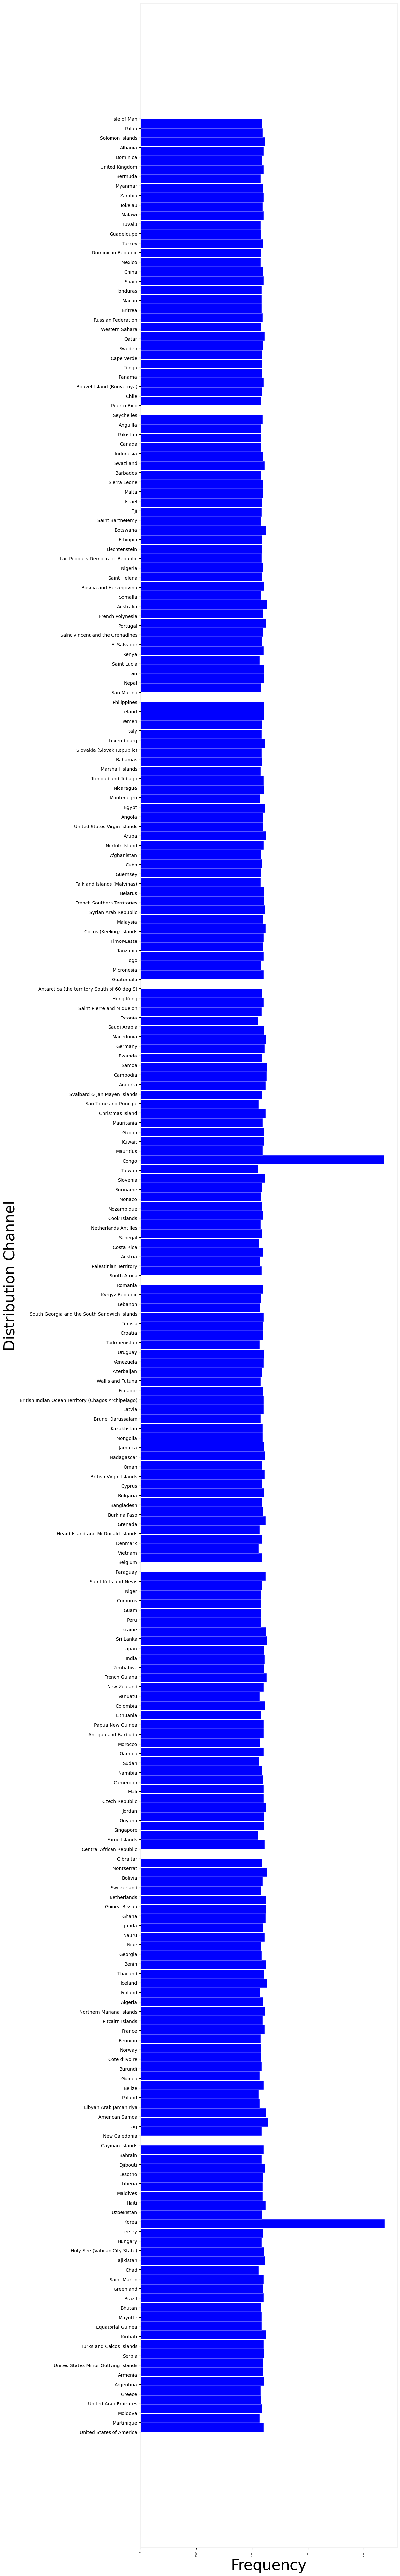

In [177]:

plt.subplots(figsize=(10,100))
plt.hist(df['DISTRIBUTION_CHANNEL'],bins=250,facecolor='blue',edgecolor='white',orientation=u'horizontal')
plt.xlabel('Frequency',fontsize=32)
plt.ylabel('Distribution Channel',fontsize=32)
plt.xticks(fontsize=5,rotation=90)


2. Create a Pie Chart on ORDER_CURRENCY

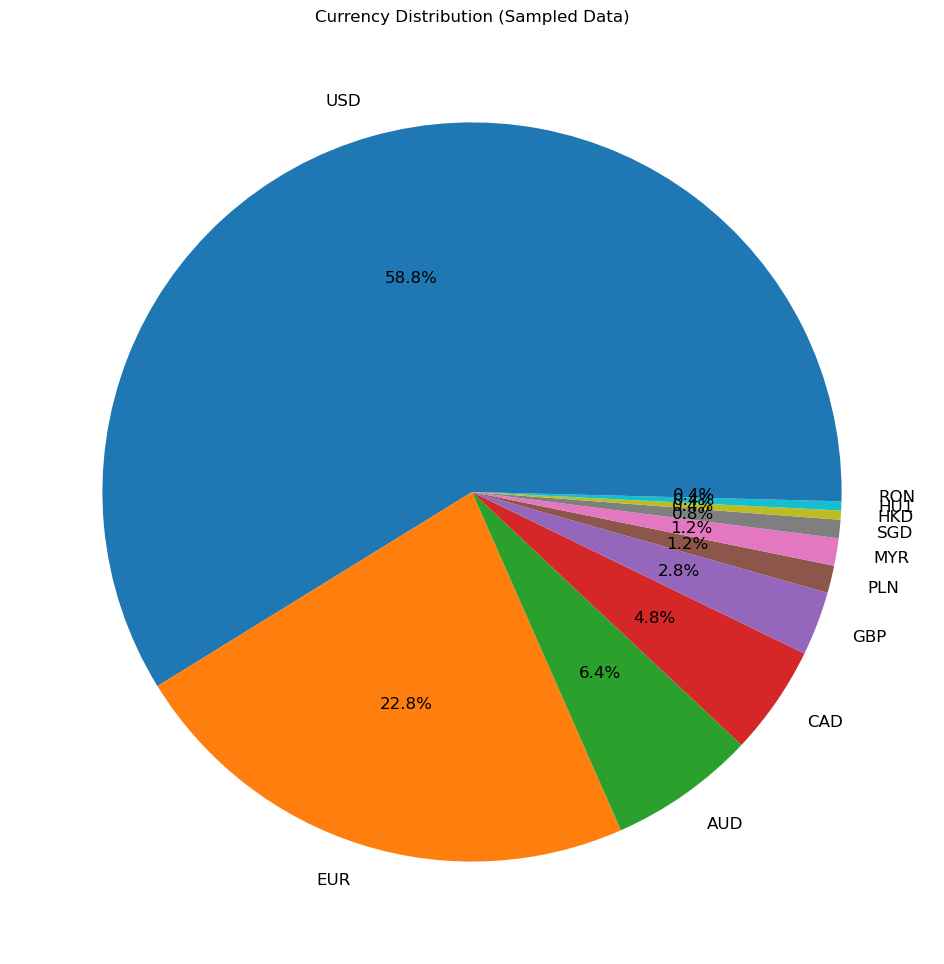

In [178]:
sample_size = 250  
sample_data = df.sample(n=sample_size, random_state=70) 
currency_counts = sample_data['ORDER_CURRENCY'].value_counts()
plt.figure(figsize=(12, 12))  
plt.pie(currency_counts.values, labels=currency_counts.index, autopct='%1.1f%%',textprops={'fontsize': 12})
plt.title('Currency Distribution (Sampled Data)')
plt.show()

3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

In [179]:
import seaborn as sns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

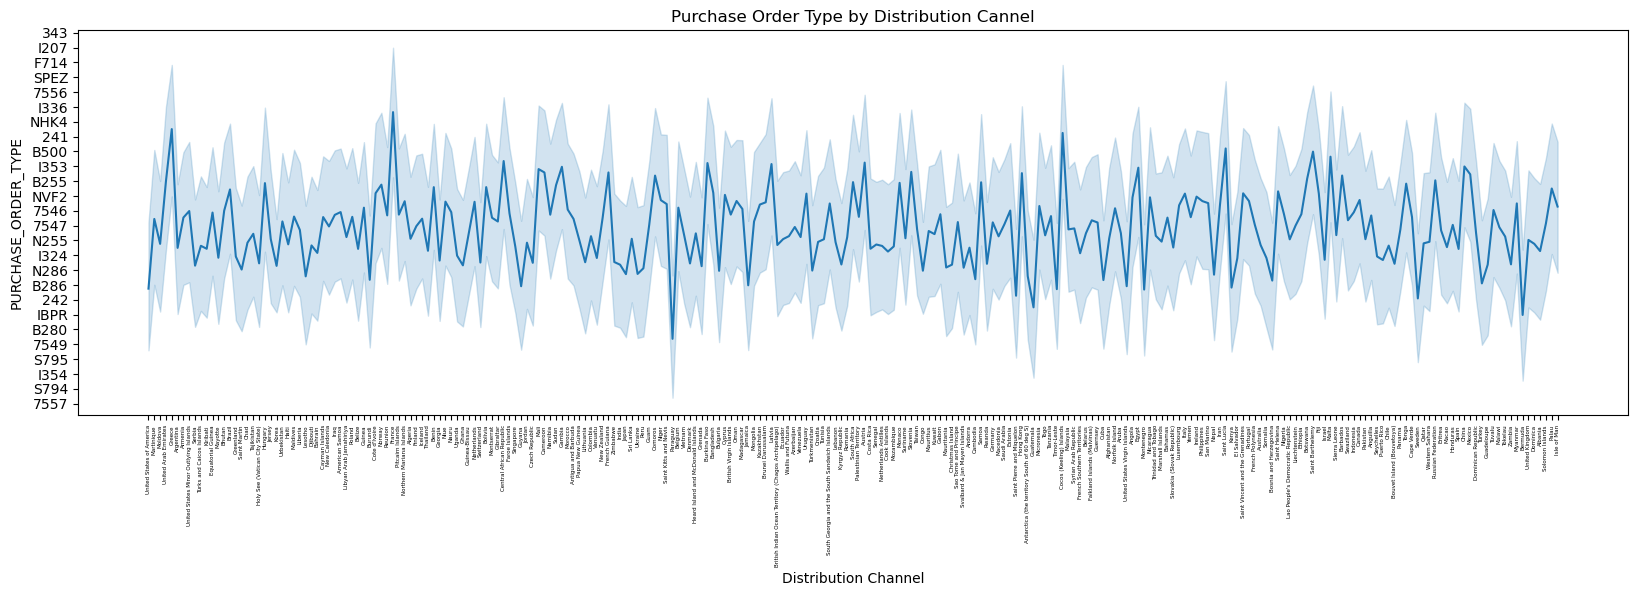

In [180]:
#Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df["DISTRIBUTION_CHANNEL"], y=df["PURCHASE_ORDER_TYPE"])
plt.title("Purchase Order Type")
plt.xlabel("Distribution Channel")
plt.title("Purchase Order Type by Distribution Cannel")
plt.xticks(rotation=90,fontsize=4)
#plt.show()


4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd


Text(0.5, 1.0, 'amount in usd by order creation date')

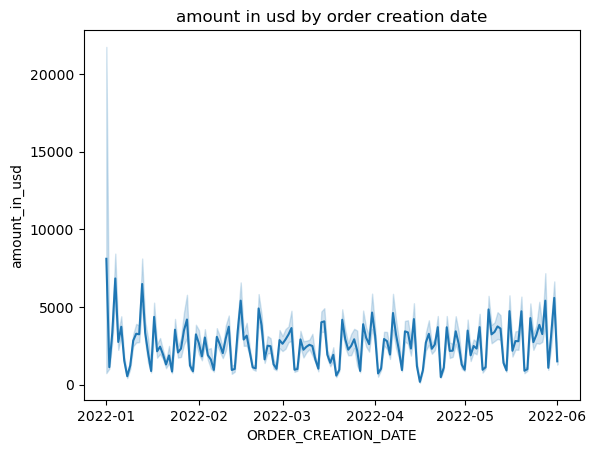

In [181]:
sns.lineplot(x=df['ORDER_CREATION_DATE'],y=df['amount_in_usd'],data=df)
plt.title("amount in usd by order creation date")

5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

Text(0.5, 1.0, 'Boxplot of Order Amount by Currency')

<Figure size 1600x1600 with 0 Axes>

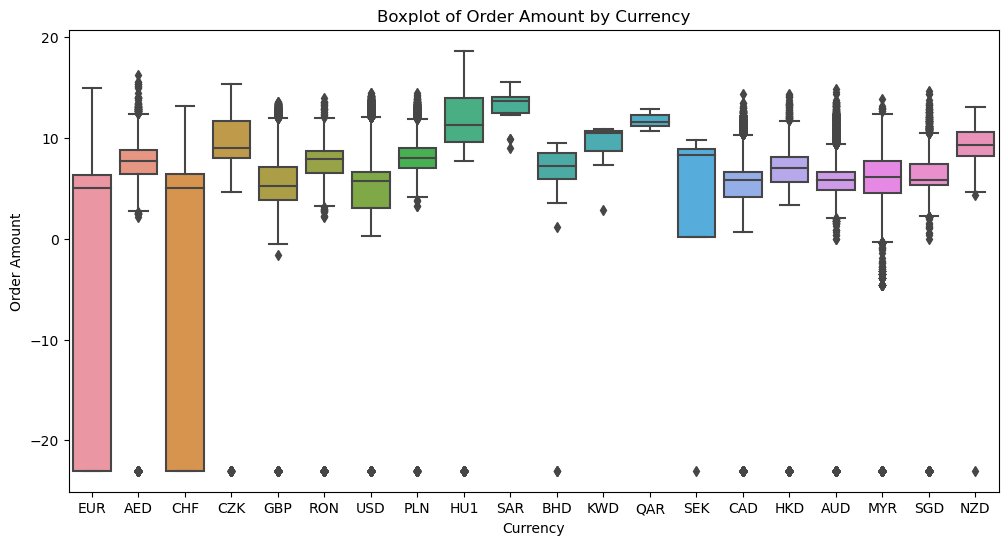

In [182]:
plt.figure(figsize=(16, 16))  
df['log_order_amount'] = np.log(df['ORDER_AMOUNT']+1e-10) #log tranforming ORDER_AMOUNT to make it appear better in the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ORDER_CURRENCY', y='log_order_amount')
plt.xlabel('Currency')
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount by Currency')

6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

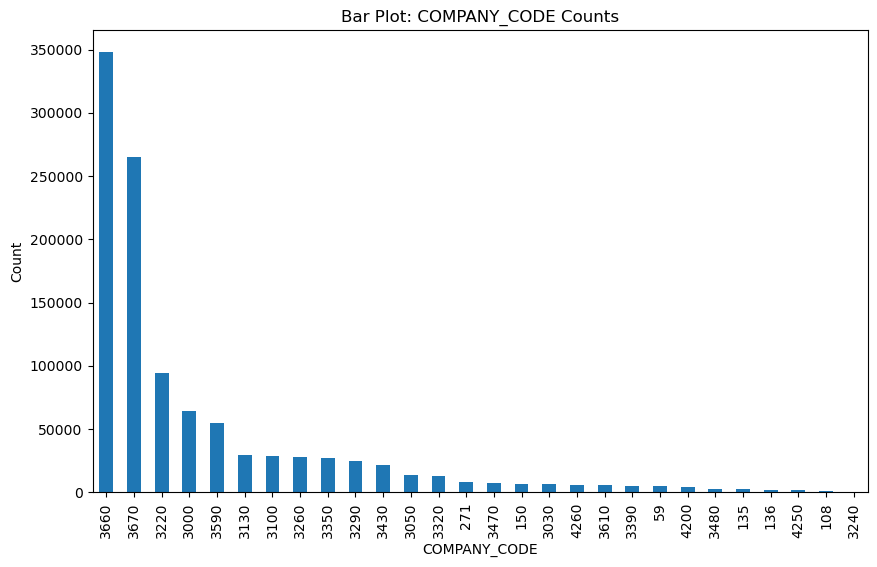

In [183]:
company_counts = df['COMPANY_CODE'].value_counts()
plt.figure(figsize=(10, 6))  
company_counts.plot(kind='bar')
plt.xlabel('COMPANY_CODE')
plt.ylabel('Count')
plt.title('Bar Plot: COMPANY_CODE Counts')
plt.xticks(rotation=90)
plt.show()

MILESTONE 3

1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

In [184]:
z_scores = np.abs((df["amount_in_usd"] - df["amount_in_usd"].mean()) / df["amount_in_usd"].std())
threshold = 3
outliers = df[z_scores > threshold] #outliers are all values with z score greater than 3 or less than -3


In [185]:
outliers

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,log_order_amount
58,761953719,3252,Georgia,South-Region,"0,00",DFUE,3350,2022-01-01,60015,SR04,933063612,471493.37,2022-01-03,EUR,NaN,1210324854,528072.5744,12103248543350,13.063660
132,814731397,4027,Oman,South-Region,"107352,71",I200,3260,2022-01-03,30134,SR02,819410924,88449.30,2022-01-11,EUR,93.0,1230023965,99063.2160,12300239653260,11.390185
148,933043193,3349,Saint Martin,South-Region,"0,00",1000,3220,2022-01-03,30441,NR03,798554798,208299.78,2022-01-07,EUR,NaN,1230023217,233295.7536,12300232173220,12.246734
348,983223343,2693,Japan,South-Region,"366309,15",DFUE,4200,2022-01-03,81016,NR04,819037667,489068.09,2022-01-13,EUR,93.0,1230015996,547756.2608,12300159964200,13.100257
360,789091919,2714,Portugal,South-Region,"139286,41",I200,3260,2022-01-03,81914,NR02,882363355,117465.90,2022-01-13,EUR,93.0,12126934,131561.8080,121269343260,11.673903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074100,776453106,3923,Haiti,South-Region,"95525,07",T001,4260,2022-05-31,134616,SR03,897982834,93482.07,2022-06-28,USD,93.0,1210072383,93482.0700,12100723834260,11.445525
1074113,967810908,2116,Slovakia (Slovak Republic),North-Region,"0,00",9999,3000,2022-05-31,210053,SR02,765608647,182947.13,2022-06-19,AUD,64.0,1230024706,137210.3475,12300247063000,12.116952
1074180,977196814,3364,Holy See (Vatican City State),North-Region,"0,00",9999,3000,2022-06-01,25947,SR01,852699630,186670.13,2022-06-19,AUD,64.0,1230024706,140002.5975,12300247063000,12.137098
1074368,860550513,3300,Tanzania,South-Region,"137314,58",9999,3000,2022-06-01,33005,NR01,875152704,125921.44,2022-06-13,AUD,93.0,1230024704,94441.0800,12300247043000,11.743413


In [186]:
median_value = df["amount_in_usd"].median()
df.loc[z_scores > threshold, "amount_in_usd"] = median_value #replace outliers with median value

2. Label encoding or One hot Encoding on all the categorical columns 


In [187]:
categorical_columns = df.select_dtypes(include=["object"]).columns #find all categorical columns
categorical_columns

Index(['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE',
       'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY',
       'CREDIT_STATUS', 'unique_cust_id'],
      dtype='object')

In [188]:
df.unique_cust_id = df.unique_cust_id.astype(int) #converting to numeric 

In [189]:
df.RELEASED_CREDIT_VALUE =  df.RELEASED_CREDIT_VALUE.str.replace(',','.') #precrosessing 

In [190]:
df['RELEASED_CREDIT_VALUE'] =  pd.to_numeric(df['RELEASED_CREDIT_VALUE'], errors='coerce') #converting to numeric 

In [191]:
df['CREDIT_STATUS'] = df['CREDIT_STATUS'].astype(str)

In [192]:
categorical_columns = df.select_dtypes(include=["object"]).columns #check for categorical columns again
categorical_columns

Index(['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE',
       'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS'],
      dtype='object')

In [193]:
from sklearn.preprocessing import LabelEncoder

In [194]:
df['CREDIT_STATUS'] = pd.to_numeric(df['CREDIT_STATUS'], errors='coerce') #binning CREDIT_STATUS
bins = [0, 20, 40, 60, 80, 100]  
df['CREDIT_STATUS_BINNED'] = pd.cut(df['CREDIT_STATUS'], bins=bins, labels=False)


In [195]:
le = LabelEncoder() #label encoding CREDIT_STATUS 
df['CREDIT_STATUS'] = le.fit_transform(df['CREDIT_STATUS_BINNED'])

In [196]:
df_dummy = df

In [197]:
columns_to_encode = ['DISTRIBUTION_CHANNEL','DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY'] #lable encoding all categorical columns
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

3. Log Transformations on continuous columns 


In [198]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Check the data type of each column
continuous_columns = []
for column in numeric_columns:
    if len(df[column].unique()) > 10000:  # considering all columns with more than 10000 unique values as continous columns 
        continuous_columns.append(column)

# Print the continuous columns
print("Continuous columns:")
print(continuous_columns)

Continuous columns:
['CUSTOMER_ORDER_ID', 'RELEASED_CREDIT_VALUE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'amount_in_usd', 'log_order_amount']


In [199]:
columns_to_transform = ['CUSTOMER_ORDER_ID', 'RELEASED_CREDIT_VALUE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'amount_in_usd']
df[columns_to_transform] = np.log(df[columns_to_transform]+ 1e-10) #log transform continous columns except ORDER_AMOUNT as it was already tranformed for box plot


4. Try to extract new features by grouping existing columns 


In [200]:
df['currency_order_count'] = df.groupby('ORDER_CURRENCY').size()
df['channel_order_proportion'] = df['DISTRIBUTION_CHANNEL'].value_counts(normalize=True)

In [201]:
from datetime import datetime
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])
df['Order_Year'] = df['ORDER_CREATION_DATE'].dt.year
df['Order_Month'] = df['ORDER_CREATION_DATE'].dt.month
df['Order_Day'] = df['ORDER_CREATION_DATE'].dt.day
df['Delivery_DayOfWeek'] = df['REQUESTED_DELIVERY_DATE'].dt.dayofweek
df['Order_Delivery_Duration'] = (df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']).dt.days

5. correlation heat map

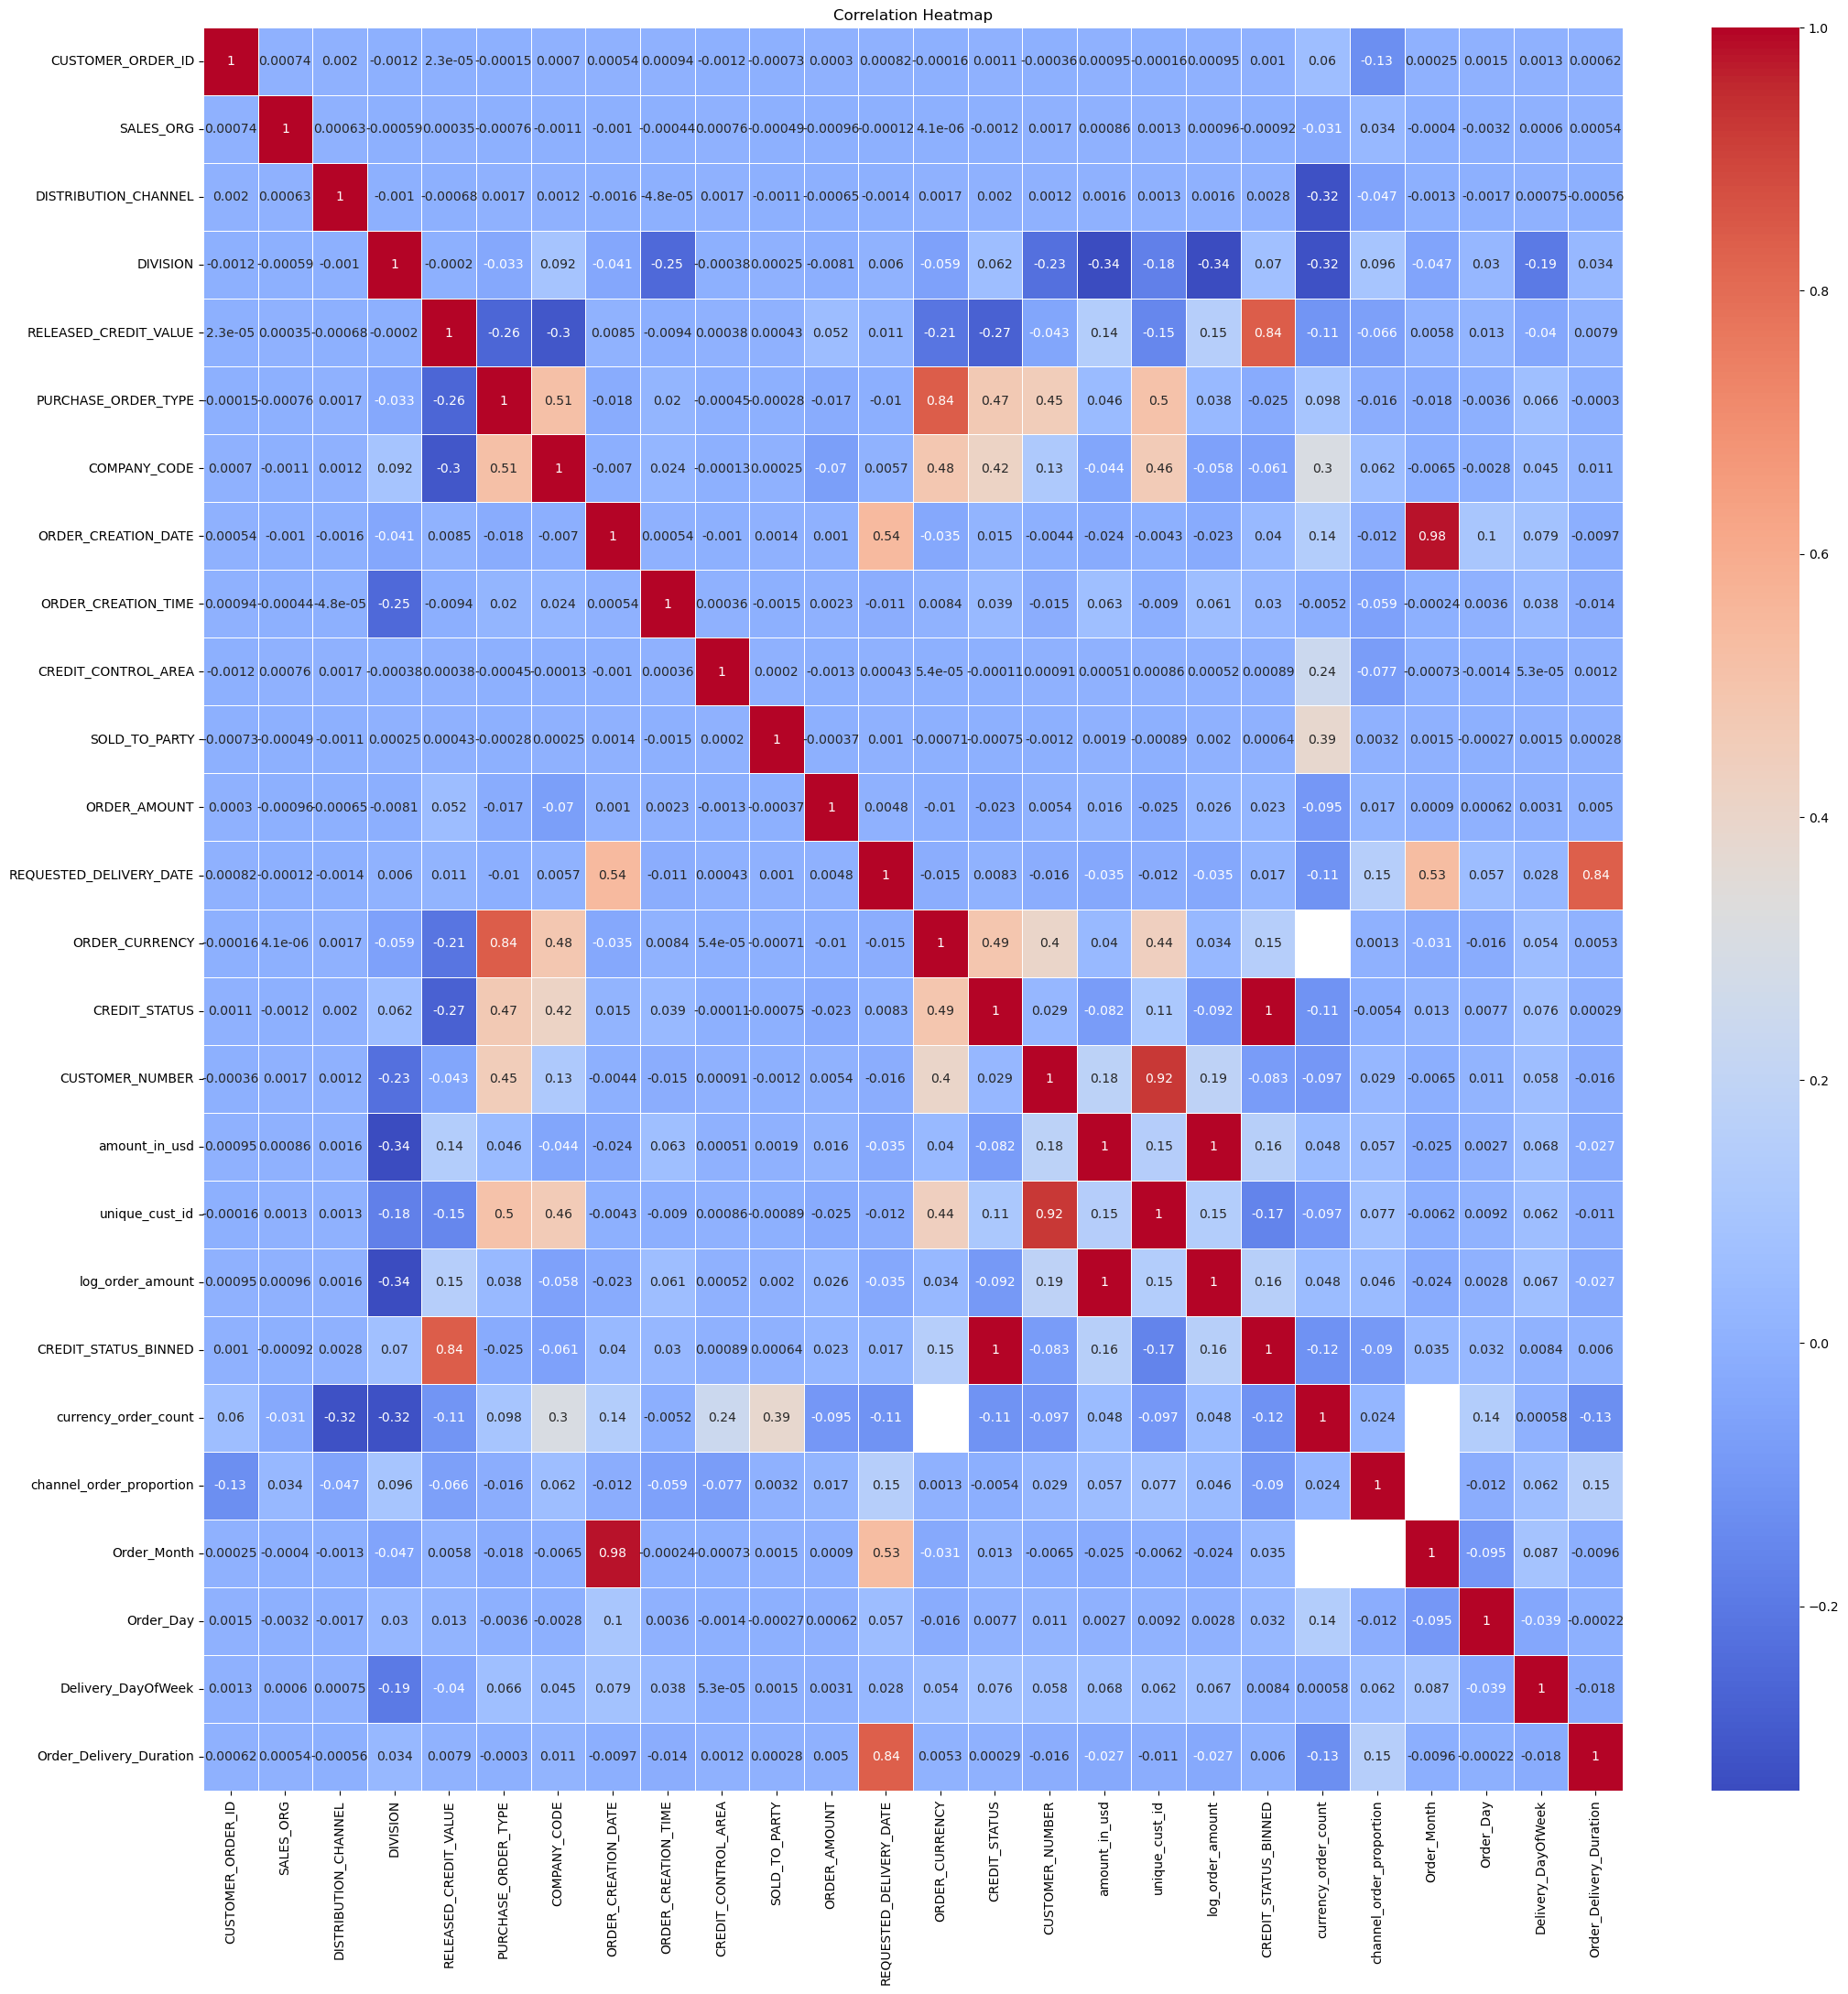

In [205]:
df_corr = df.drop('Order_Year',axis=1)
correlation_matrix = df_corr.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



6. Try to identify important or relevant columns for feature extraction


In [206]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) #filling infinity values with nan
medians = df.median() #replacing nan with median
df.fillna(medians, inplace=True)

In [207]:
corr_matrix = df.corr() #correlation analysis to find relevant features 
corr_with_target = corr_matrix['amount_in_usd'].abs().sort_values(ascending=False)
correlation_threshold = 0 
relevant_features = corr_with_target[corr_with_target > correlation_threshold]
print("Relevant Features:")
print(relevant_features)

Relevant Features:
amount_in_usd               1.000000
log_order_amount            0.998719
DIVISION                    0.340125
CUSTOMER_NUMBER             0.181892
unique_cust_id              0.147701
RELEASED_CREDIT_VALUE       0.143967
CREDIT_STATUS_BINNED        0.105152
CREDIT_STATUS               0.081604
Delivery_DayOfWeek          0.067793
ORDER_CREATION_TIME         0.063023
PURCHASE_ORDER_TYPE         0.045695
COMPANY_CODE                0.044149
ORDER_CURRENCY              0.039537
REQUESTED_DELIVERY_DATE     0.035351
Order_Delivery_Duration     0.026636
Order_Month                 0.024868
ORDER_CREATION_DATE         0.023569
ORDER_AMOUNT                0.015708
Order_Day                   0.002661
SOLD_TO_PARTY               0.001938
DISTRIBUTION_CHANNEL        0.001615
channel_order_proportion    0.000984
CUSTOMER_ORDER_ID           0.000953
SALES_ORG                   0.000864
currency_order_count        0.000786
CREDIT_CONTROL_AREA         0.000509
Name: amount_in_usd

In [208]:
X = df.drop('amount_in_usd', axis=1) #defining features set

In [209]:
X = X.drop('ORDER_AMOUNT',axis = 1) #dropping target and other columns derived from target variable 

In [210]:
X = X.drop('log_order_amount',axis = 1) #dropping target and other columns derived from target variable 

In [211]:
X = X.apply(pd.to_numeric, errors='coerce') #convert feature set to numeric 


In [212]:
X = X.dropna()
y = df['amount_in_usd'] #defining target variable


relevent feature extraction using lasso regression

In [213]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength

# Fit the Lasso model on the scaled features and target variable
lasso.fit(X_scaled, y)

# Get the coefficients and corresponding feature names
feature_coefficients = dict(zip(X.columns, lasso.coef_))

# Sort the feature coefficients by absolute value in descending order
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature coefficients
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")


DIVISION: -3.7542392983143973
RELEASED_CREDIT_VALUE: 1.814588951814547
CUSTOMER_NUMBER: 0.6051725880696323
unique_cust_id: 0.5693312098075611
CREDIT_STATUS: -0.4540576532446392
PURCHASE_ORDER_TYPE: 0.42010369483388615
Order_Month: -0.29108905162433507
REQUESTED_DELIVERY_DATE: -0.14787651367228163
CREDIT_STATUS_BINNED: -0.07723300684129164
ORDER_CREATION_TIME: -0.030754252834769513
Delivery_DayOfWeek: 0.029354518947815843
CUSTOMER_ORDER_ID: 0.0
SALES_ORG: 0.0
DISTRIBUTION_CHANNEL: 0.0
COMPANY_CODE: -0.0
ORDER_CREATION_DATE: -0.0
CREDIT_CONTROL_AREA: 0.0
SOLD_TO_PARTY: 0.0
ORDER_CURRENCY: -0.0
currency_order_count: 0.0
channel_order_proportion: 0.0
Order_Year: 0.0
Order_Day: 0.0
Order_Delivery_Duration: -0.0


relevant feature extraction using recursive feature elimination

In [214]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
num_features = 10
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=num_features)
X_selected = rfe.fit_transform(X, y)
selected_feature_names = X.columns[rfe.support_]
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
DIVISION
RELEASED_CREDIT_VALUE
ORDER_CREATION_TIME
SOLD_TO_PARTY
ORDER_CURRENCY
CREDIT_STATUS
CREDIT_STATUS_BINNED
channel_order_proportion
Order_Month
Delivery_DayOfWeek


MILESTONE 4

1. Modify the dataset to pass into any type of machine learning models. 
2. Try different machine learning models like - 


3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [216]:
X = df[['RELEASED_CREDIT_VALUE',
'CREDIT_STATUS_BINNED',
'DIVISION',
'unique_cust_id',
'ORDER_CREATION_TIME']]
X = scaler.fit_transform(X)
y = df['amount_in_usd']
y = y.values.reshape(-1, 1)

# Scale the features and target variable

y = scaler.fit_transform(y).flatten()  # Flatten y back to 1D array



In [217]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


a. Linear Regression

In [218]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_mse=mean_squared_error(y_test, lr_predictions, squared=True)
lr_r2 = r2_score(y_test, lr_predictions)

b. SVM

In [219]:
import warnings
from sklearn.exceptions import ConvergenceWarning

In [220]:
# # Support Vector Machine (SVM)
from sklearn.svm import LinearSVR

# Create an instance of LinearSVR
svm = LinearSVR(max_iter=10000)

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fit the LinearSVR model
svm.fit(X_train, y_train)

# Make predictions
svm_predictions = svm.predict(X_test)

# Calculate the RMSE and R2 score
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_mse = mean_squared_error(y_test, svm_predictions, squared=True)
svm_r2 = r2_score(y_test, svm_predictions)

# Print the results
print("Linear SVR - RMSE:", svm_rmse)
print("Linear SVR - R2 Score:", svm_r2)

Linear SVR - RMSE: 1.102922534570176
Linear SVR - R2 Score: -0.21706528886793275


c. Decision Tree


In [221]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_mse = mean_squared_error(y_test, dt_predictions, squared=True)
dt_r2 = r2_score(y_test, dt_predictions)


d. Random Forest 


In [222]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mse = mean_squared_error(y_test, rf_predictions, squared=True)
rf_r2 = r2_score(y_test, rf_predictions)


e. AdaBoost

In [223]:
# AdaBoost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
ada_rmse = mean_squared_error(y_test, ada_predictions, squared=False)
ada_mse = mean_squared_error(y_test, ada_predictions, squared=True)
ada_r2 = r2_score(y_test, ada_predictions)


f. XGBoost

In [224]:
# XGBoost
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_test)
xgboost_rmse = mean_squared_error(y_test, xgboost_predictions, squared=False)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions, squared=True)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

4. Compare the accuracies of all the models 



In [225]:
reg = {'Linear Regression':(lr_rmse,lr_mse,lr_r2),'Decision Tree':(dt_rmse,dt_mse,dt_r2),
       'Random Forest':(rf_rmse,rf_mse,rf_r2),'AdaBoost':(ada_rmse,ada_mse,ada_r2),'XGBoost':(xgboost_rmse,xgboost_mse,xgboost_r2),'SVM':(svm_rmse,svm_mse,svm_r2)}

In [226]:
for mod in reg.keys():
    print(f"For {mod}:")
    print(f"RMSE = {reg[mod][0]}")
    print(f"MSE = {reg[mod][1]}")
    print(f"R2 = {reg[mod][2]}")
    print()

For Linear Regression:
RMSE = 0.9211448173720841
MSE = 0.8485077745714501
R2 = 0.15105475148270975

For Decision Tree:
RMSE = 0.7548804489892774
MSE = 0.5698444922662531
R2 = 0.42986170710396143

For Random Forest:
RMSE = 0.7095581547708937
MSE = 0.5034727750018755
R2 = 0.4962676443223736

For AdaBoost:
RMSE = 0.9616582424838149
MSE = 0.9247865753370599
R2 = 0.07473662286536431

For XGBoost:
RMSE = 0.6340730835903908
MSE = 0.4020486753338268
R2 = 0.5977440362644766

For SVM:
RMSE = 1.102922534570176
MSE = 1.2164381172627015
R2 = -0.21706528886793275



5. Select the best possible model

In [227]:
best_model = min(reg, key=lambda x: reg[x][0])
best_model

'XGBoost'

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074783 entries, 0 to 1074782
Data columns (total 27 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CUSTOMER_ORDER_ID         1074783 non-null  float64       
 1   SALES_ORG                 1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL      1074783 non-null  int64         
 3   DIVISION                  1074783 non-null  int64         
 4   RELEASED_CREDIT_VALUE     1074783 non-null  float64       
 5   PURCHASE_ORDER_TYPE       1074783 non-null  int64         
 6   COMPANY_CODE              1074783 non-null  int64         
 7   ORDER_CREATION_DATE       1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME       1074783 non-null  float64       
 9   CREDIT_CONTROL_AREA       1074783 non-null  int64         
 10  SOLD_TO_PARTY             1074783 non-null  float64       
 11  ORDER_AMOUNT              1074783 non-null  float6

6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [229]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [230]:
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'learning_rate': uniform(0.001, 0.1),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of each tree
    'subsample': uniform(0.5, 0.5),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5)  # Minimum loss reduction required to make a further partition on a leaf node
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(xgboost, param_dist, n_iter=10, scoring='r2', cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
xgboost_best = xgb.XGBRegressor(**best_params)
xgboost_best.fit(X_train, y_train)

# Make predictions and evaluate the model
xgboost_predictions = xgboost_best.predict(X_test)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print("Improved R2 Score:", xgboost_r2)

Best Hyperparameters: {'colsample_bytree': 0.8551148554103308, 'gamma': 0.14415396537446734, 'learning_rate': 0.0880310781108577, 'max_depth': 7, 'n_estimators': 746, 'subsample': 0.6343885310509466}
Improved R2 Score: 0.6187887843677209


In [231]:
import joblib
joblib.dump(xgboost_best, 'xgboost_model.pkl') #saving the model for future use

['xgboost_model.pkl']

In [233]:
xgboost_predictions_train = xgboost_best.predict(X_train) 

In [234]:
xgboost_r2_train = r2_score(y_train, xgboost_predictions_train) #R2 score of the train data
xgboost_r2_train


0.63331171554452

In [235]:
print(f'R2 score of test data: {xgboost_r2}')

R2 score of test data: 0.6187887843677209


Model Ensemble

In [236]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Base models
xgb_model = XGBRegressor()
gb_model = GradientBoostingRegressor()

# Stacking ensemble
estimators = [
    ('xgb', xgb_model),
    ('gb', gb_model)
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Evaluate models using cross-validation
models = [xgb_model, gb_model, stacking_model]
model_names = ['XGBoost', 'Gradient Boosting', 'Stacking']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f'{name} - Cross-validated R2 score: {scores.mean()}')

# Train the stacking ensemble on the full training set
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
stacking_predictions = stacking_model.predict(X_test)

# Calculate the R2 score on the test set
stacking_r2 = r2_score(y_test, stacking_predictions)
print(f'Stacking - Test R2 score: {stacking_r2}')


XGBoost - Cross-validated R2 score: 0.5996899505645565
Gradient Boosting - Cross-validated R2 score: 0.3186171929549908
Stacking - Cross-validated R2 score: 0.6017684969926606
Stacking - Test R2 score: 0.6013640947354388


In [238]:
#Model ensemble does not show significant improvement of R2 score compared to hyperparameter tuning XGBoost.
#Conclusion: Choosing hyperparameter tuned XGBoost

In [239]:
print(f'Final R2 score of test data using XGBoost: {xgboost_r2}')

Final R2 score of test data using XGBoost: 0.6187887843677209
